In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [ ]:
#Montaje de archivos de google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Carga de datos
alturas_data = pd.read_csv('/content/gdrive/MyDrive/EL2/Practica2/Alturas.csv')
valtest_data = pd.read_csv('/content/gdrive/MyDrive/EL2/Practica2/valtest.csv')
anomalias_data = pd.read_csv('/content/gdrive/MyDrive/EL2/Practica2/anomalias.csv')
alturas_data.rename(columns = {'Estatura(metros)':'Estatura', 'Edad(años)':'Edad'}, inplace = True)

In [ ]:
valtest_data_cv, valtest_data_test = train_test_split(valtest_data,test_size=0.5)
anomalias_data_cv, anomalias_data_test = train_test_split(anomalias_data,test_size=0.5)

In [ ]:
anomalias_data_test

,Estatura,Edad
1,175.1,2.5
3,150.0,14.0


In [ ]:
#Definición de funciones
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
  best_epsilon = 0
  best_f1 = 0
  f = 0
  stepsize = (max(probs) - min(probs)) / 1000
  epsilons = np.arange(min(probs),max(probs),stepsize)
  for epsilon in np.nditer(epsilons):

      predictions = (probs < epsilon) 
      #print(predictions)
      f = f1_score(gt, predictions,average='binary')
      #print(f)
      #print('------')
      if f > best_f1:
          #print('----')
          best_f1 = f
          best_epsilon = epsilon

  return best_f1, best_epsilon

Número de puntos en el set de entrenamiento: 53
Numero de dimensiones/caracteristicas: 2


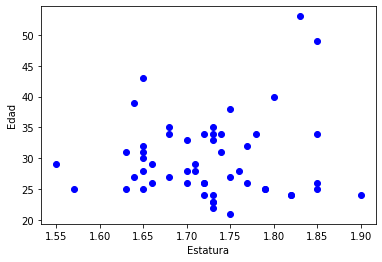

In [ ]:
#Exploración de datos
n_training_samples = alturas_data.shape[0]
n_dim = alturas_data.shape[1]

print('Número de puntos en el set de entrenamiento: %d' % n_training_samples)
print('Numero de dimensiones/caracteristicas: %d' % n_dim)

plt.scatter(alturas_data["Estatura"],alturas_data["Edad"],c='blue')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()


In [ ]:
gkde = gaussian_kde(valtest_data_test.T)

,4,7,6,0
Estatura,1.82,1.61,1.79,1.82
Edad,30.00,31.00,31.00,25.00


In [ ]:
gkde.evaluate(valtest_data_test.T)

array([0.48650274, 0.26542052, 0.48444562, 0.26639768])

In [ ]:
#Entrenamiento 
alturas_data_result = alturas_data
mu, sigma = estimateGaussian(alturas_data)
p = multivariateGaussian(alturas_data,mu,sigma)
alturas_data_result['p'] = p

#Cross Validation
p_cv = multivariateGaussian(valtest_data_cv,mu,sigma)
print(p_cv)

#Cross Validation Anomalias
p_cv = multivariateGaussian(anomalias_data_cv,mu,sigma)
print(p_cv)


[0.05153336 0.28473704 0.17004119 0.07672978]
[1.54431994e-88 0.00000000e+00]


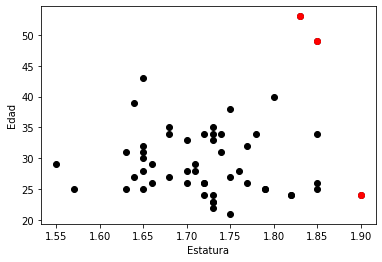

In [ ]:
plt.scatter(alturas_data_result["Estatura"],alturas_data_result["Edad"],c='black')
plt.scatter(alturas_data_result[p<0.0154]["Estatura"],alturas_data_result[p<0.0154]["Edad"],c='red')
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()


## Conclusiones

Al realizar las validación cruzada con los datos históricos conocidos como anomalias (pestaña valtest(anomalias)) la probabilidad se encontraba con un valor muy cercano a cero, por lo que no es posible obtener datos precisos de predicciones ni metricas.